``lux.ai - Curso de Fotografia Computacional - Aprendizado de Máquina e Profundo``

## Restauração de imagens com UNet

```OBS: Quando pedido, realize a operação na célula correspondente atribuindo o resultado na variável indicada. Não altere os nomes das variáveis utilizadas. Você pode utilizar celular adicionais para realizar testes, utilizando variaveis auxiliares para visualizar resultados intermediários.```

Neste exemplo, vamos gerar um modelo que identifica e remove o ruído de uma imagem de entrada, como na imagem de exemplo abaixo:

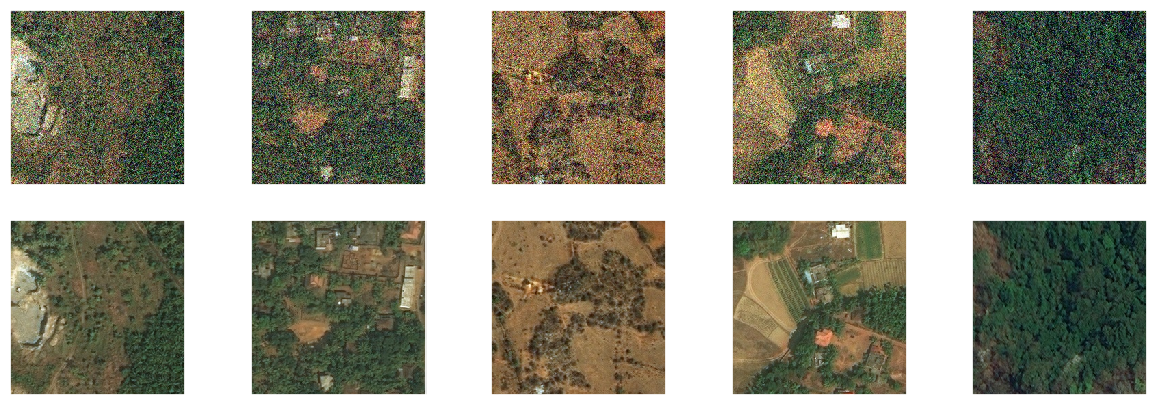

A imagem foi obtida do dataset [*Forest Aerial Images for Segmentation*](https://www.kaggle.com/datasets/quadeer15sh/augmented-forest-segmentation?resource=download)

Ilke Demir, et al. DeepGlobe 2018: A Challenge to Parse the Earth Through Satellite Images, CVPRW 2018.

O dataset foi inicialmente proposto para segmentação, por isso vamos processa-lo e adicionar as informações necessárias para podermos treinar nosso modelo.

No diagrama abaixo temos o fluxo utilizado para gerar os exemplos e treinar os modelos:

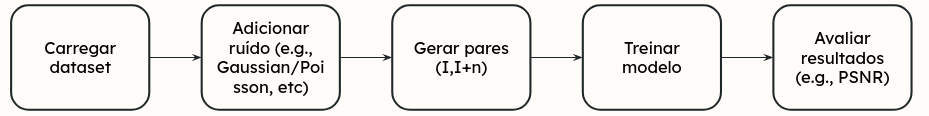

Primeiro, carregamos as imagens do dominio avaliado e adicionamos o ruído para que o modelo aprenda a identificar e remover a informação adicionada.

Nesse caso, a imagem original será a nossa label (target) e a imagem alterada será o exemplo passado para a rede.

Neste exemplo, vamos utilizar o [ruído gaussiano](https://pt.wikipedia.org/wiki/Ru%C3%ADdo_gaussiano).

O modelo que utilizaremos será a UNet, que deve receber as imagens com tamanho de entrada 256x256x3.
A especificação do modelo pode ser vista abaixo:

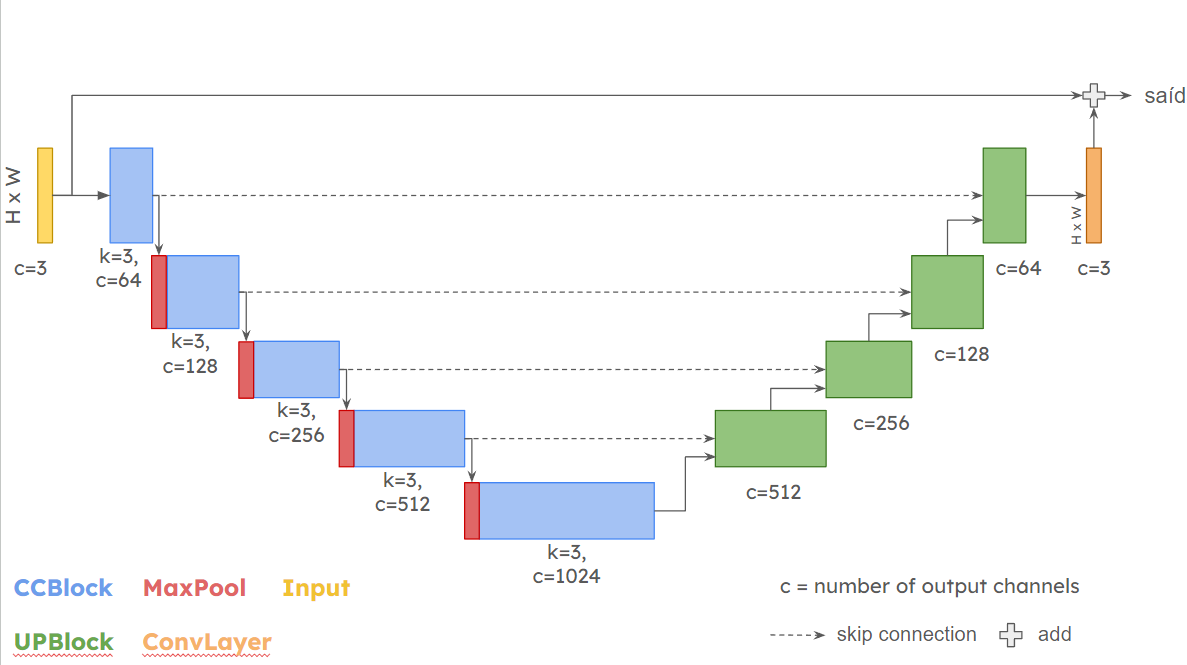

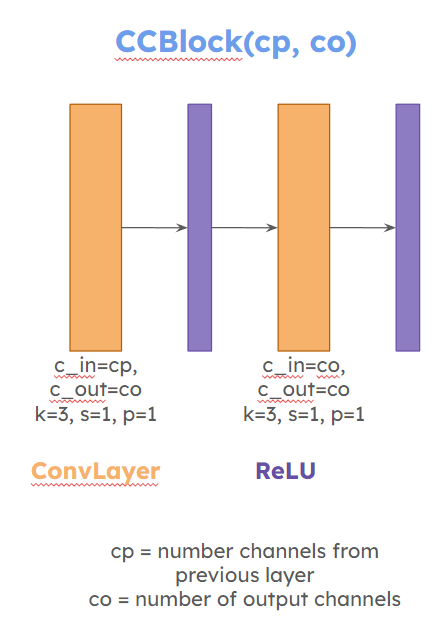

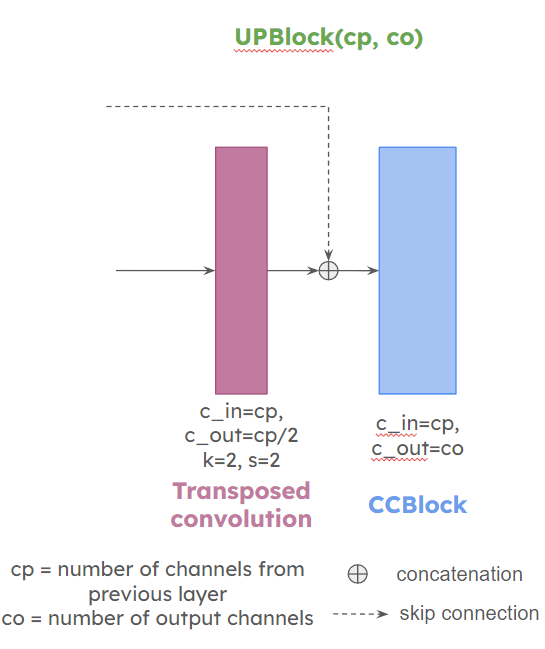

### 01 Importando bibliotecas e carregando o dataset

In [ ]:
# modelagem e dados
import torch
from torchvision import transforms, datasets, models
from torch import nn, optim
from torch.utils import data

# avaliação de modelos
from sklearn.model_selection import train_test_split

# plotting e visualização
from torchsummary import summary
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# operações de imagem
import cv2
from PIL import Image
import albumentations as A

# outros
import zipfile
import os
import glob
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
# fazer o download do dataset
!gdown 19nkkxpK8LN7fk9VPCdR1heatXhQKNWtO
!unzip kaggle_forest_segmentation.zip -d .

In [ ]:
class AverageMeter:
    """Computes and stores the average and current value"""
    # fonte: https://kaiyangzhou.github.io/deep-person-reid/_modules/torchreid/utils/avgmeter.html#AverageMeter
    def __init__(self):
        self.reset()

    def reset(self):
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

### 01 - Gerando o dataset

#### 01.1 Defina a função que adiciona ruído normal na imagem
- A função receberá a imagem (np) com pixels entre 0 e 1, e o valor sigma
- Adicione o ruído gaussiano ([np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) com média 0 e variancia sigma/255 (lembre de checar se os valores ultrapassam o range 0-1, use o [np.clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) para ajustar os valores)

In [ ]:
def add_noise(image, sigma) -> np.array:
  pass

In [ ]:
metadata_file = "./kaggle_forest_segmentation/Forest Segmented/Forest Segmented/meta_data.csv"
metadata = pd.read_csv(metadata_file)
metadata.head()

In [ ]:
DIRECTORY = "./kaggle_forest_segmentation/Forest Segmented/Forest Segmented/"
SIGMA     = 50

if not os.path.exists(os.path.join(DIRECTORY, "noisy")):
    os.mkdir(os.path.join(DIRECTORY, "noisy"))

noisy_imgs = []
for i in tqdm(range(len(metadata))):
    path = os.path.join(DIRECTORY, "images", metadata.iloc[i]["image"])
    img = cv2.imread(path)
    noisy = add_noise(img, SIGMA)
    noisy_path = os.path.join(DIRECTORY, "noisy", metadata.iloc[i]["image"].replace("sat", "noisy"))
    if cv2.imwrite(noisy_path, noisy):
        noisy_imgs.append(metadata.iloc[i]["image"].replace("sat", "noisy"))
    else:
        noisy_imgs.append(np.nan)

metadata["noisy"] = noisy_imgs

# Estrutura da pasta
"""
kaggle_forest_segmentation
  Forest Segmented/
    Forest Segmented/
      images/
      masks/
      noisy/
      meta_data.csv
"""

In [ ]:
metadata.head()

In [ ]:
train_val_paths, test_paths = train_test_split(metadata, test_size=0.2)
train_paths, val_paths = train_test_split(train_val_paths, test_size=0.15)

In [ ]:
# os exemplos estarão dividos e serão acessados atraves do dataframe carregado
train_paths.shape[0], val_paths.shape[0], test_paths.shape[0]

#### 01.2 Crie a classe de dataset que vamos utilizar para o treinamento
- defina as funções `__init__`, `__len__`, e `__getitem__`
- retorne a imagem original e a imagem com ruído
- Antes de retornar, transforme as imagens para torch.Tensor
- Lembre de ajustar as dimensões antes de retornar (torch=C,H,W, numpy/opencv=H,W,C)
- cheque o conteudo de train_paths, val_paths e test_paths, você deve ter acesso as imagens originais e com ruído a partir dessas variaveis (elas devem ser passadas no `__init__`)

In [ ]:
class ForestImages(data.Dataset):

  def __init__(self, paths):
    pass

  def __len__(self):
    pass

  def __getitem__(self, index):
    pass

#### 01.3 Crie as variaveis do dataset de treino, validação e teste passando os respectivos caminhos e gere os dataloaders que serão usados no treino

In [ ]:
train_ds = _
valid_ds = _
test_ds  = _

train_dl = _
valid_dl = _
test_dl  = _

instances, targets = next(iter(train_dl))

print(instances.shape, targets.shape)

In [ ]:
w = 5
fig, ax = plt.subplots(2, w, figsize=(15, 5))
for j in range(w):
    ax[0][j].imshow(instances[j].permute(1, 2, 0).numpy().astype("uint8"), cmap="gray", interpolation="None")
    ax[0][j].set_xticks([])
    ax[0][j].set_yticks([])

    ax[1][j].imshow(targets[j].permute(1, 2, 0).numpy().astype("uint8"), interpolation="None")
    ax[1][j].set_xticks([])
    ax[1][j].set_yticks([])

### 02 - Defina o modelo

#### 02.1 - Defina o bloco "CCBlock" como uma classe que herda de nn.Module (implemente o `__init__` e `forward`)
#### 02.2 - Defina o bloco "UpBlock"
- Voce pode utilizar o CCBlock internamente
- Trate no forward o uso da entrada e do skip connection
- Para juntar a entrada da camada com a entrada do skip use a função `torch.cat`

#### 02.3 - Construa o modelo utilizando as classes CCBlock e UpBlock
- Utilize outros módulos quando necessário (e.g., max pooling, convlayer)

#### 02.4 - Crie uma instancia para o modelo e passe para o device do ambiente
#### 02.5 - Imprima o modelo com o summary

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

In [ ]:
class CCBlock(nn.Module):

  def __init__(self, in_channels, out_channels):
    super().__init__()
    pass


  def forward(self, x):
    pass

In [ ]:
class UpBlock(nn.Module):

  def __init__(self, in_channels, out_channels):
    super().__init__()
    pass

  def forward(self, x, skip):
    pass

In [ ]:
class Unet(nn.Module):

  def __init__(self, in_channels=3, out_channels=3):
    super().__init__()
    pass

  def forward(self, x):
    pass

In [ ]:
summary(Unet().to(device), (3, 256, 256), 1, device.type)

In [ ]:
model = _

### Faça o treinamento

#### 03.1 Implemente o passo de treinamento
- Ative o modo de treino
- Faça o loop para iterar sob os batches
- Passe os exemplos e labels para o device do ambiente
- Realize os passos de treino (predição, loss, backpropagation)
- Retorne a média do loss

#### 03.2 Implemente o passo de validação
- Ative o modo de avaliação
- Desative os gradientes
- Faça o loop para iterar sob os batches
- Realize a avaliação (predição, loss)
- Retorne a média do loss

In [ ]:
def train_step(model, loader, loss_fn, optimizer, device) -> float:
  pass

def validation_step(model, loader, loss_fn, device) -> float:
  pass

#### 03.4 Defina a função para executar o treino
- Defina o otimizador
- Defina a função de loss (use o loss L1)
- Defina o numero de epocas
- Itere sob as épocas executando o treinamento e validação em cada passo
- Salve (em lista) o loss de treino e validação em cada passo (imprima também o resultado em cada passo)
- Escolha o otimizador, o learning rate e o número de épocas para que o modelo aprenda corretamente (avalie os valores de loss de treino e validação para checar o resultado, e.g., overfitting ou underfitting)

In [ ]:
train_losses = list()
valid_losses = list()

In [ ]:
def train_model():
  pass

In [ ]:
train_model()

In [ ]:
def plot_loss(loss_train, loss_valid):
  plt.plot(loss_valid, label='valid')
  plt.plot(loss_train, label='train')
  plt.title('Loss per epoch');
  plt.ylabel('loss');
  plt.xlabel('epoch')
  plt.legend()
  plt.show()

plot_loss(train_losses, valid_losses)

### 03.5 Salve o modelo

### 04 - Teste se o seu modelo está removendo ruídos corretamente